In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from scipy import stats

# 01 - Problem (case study)
Data Description.

Goal.

In [2]:
# We are trying to predict the claim amount.

# 02 - Getting Data
Read the .csv file.

In [3]:
df = pd.read_csv("marketing_customer_analysis.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 03 - Cleaning/Wrangling/EDA
Change headers names.

In [4]:
cols = [col_name.lower().replace(" ", "_") for col_name in df.columns]
df.columns = cols
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Deal with NaN values.

In [5]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [6]:
# there are no NaN values in the dataframe. If there were, I would use .fillna() or .dropna() to replace the values or delete the row.

Categorical Features.

In [7]:
df_cat = df.select_dtypes(include = np.object)
df_cat.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

Numerical Features.

In [8]:
df_num = df.select_dtypes(include = np.number)
df_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

Exploration.

In [9]:
df_num.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


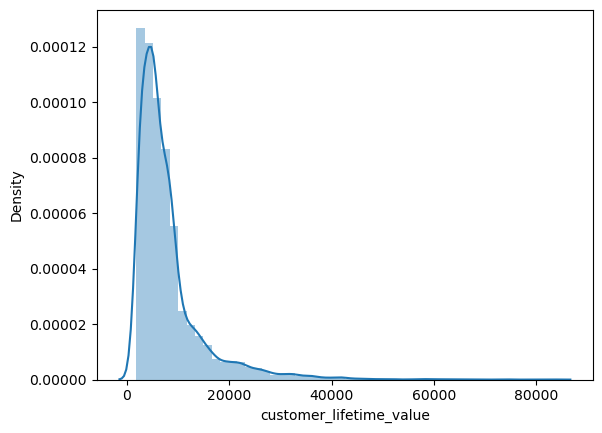

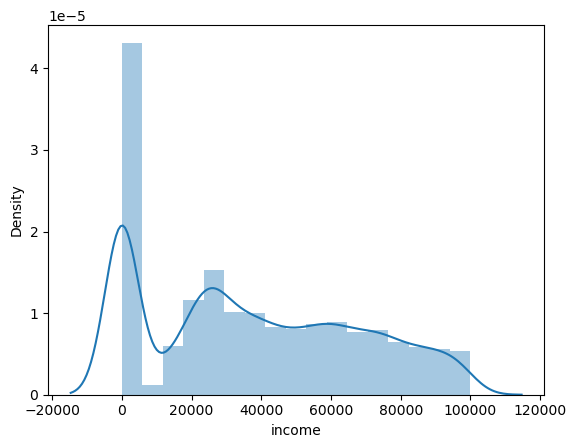

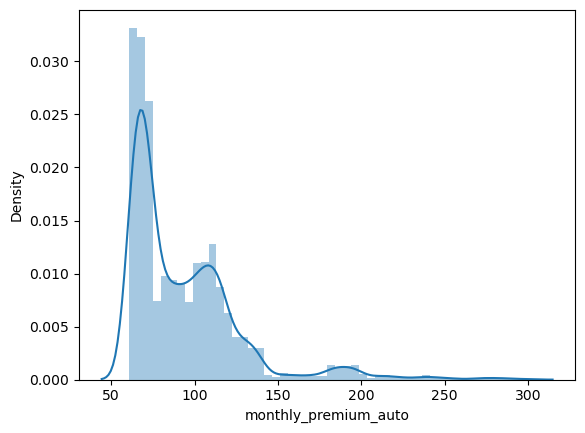

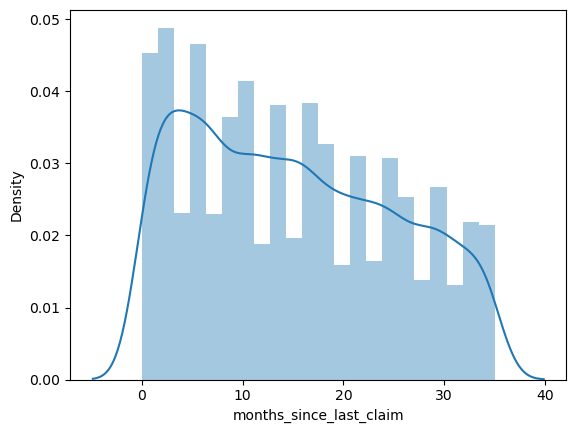

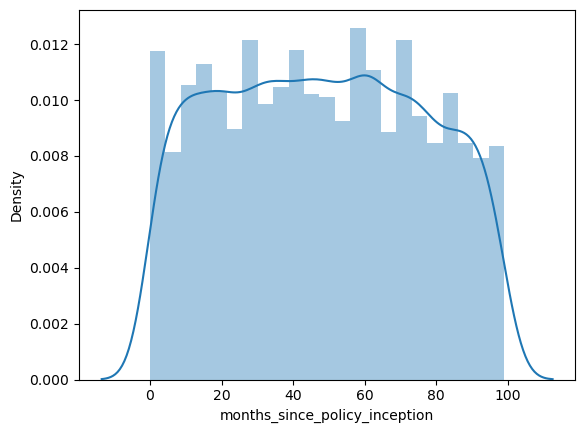

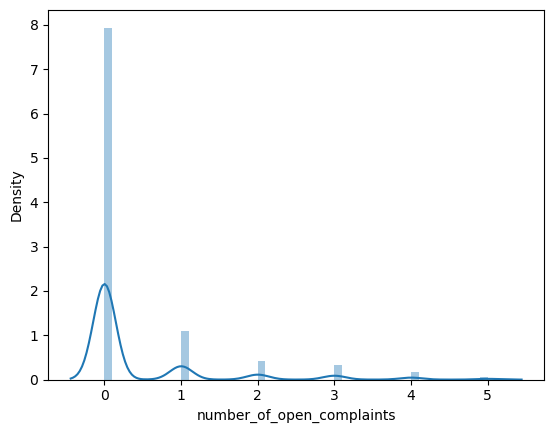

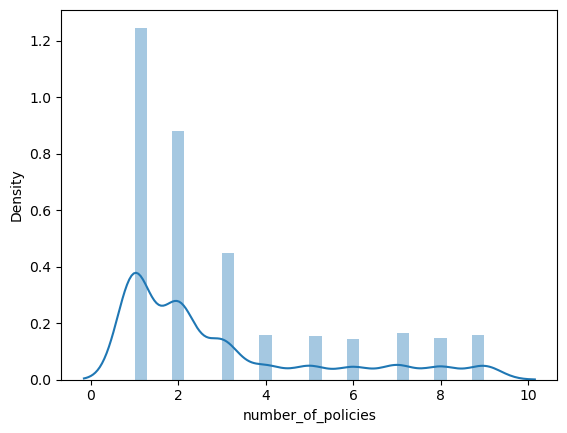

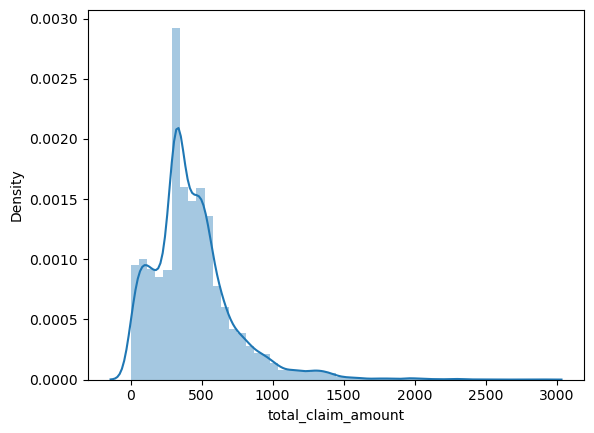

In [10]:
# distribution of the numerical variables
for column in df_num.columns:
    sns.distplot(df_num[column])
    plt.show()

In [11]:
# correlations between the numerical variables
round(df_num.corr(),2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23
income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36
monthly_premium_auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63
months_since_last_claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01
months_since_policy_inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00
number_of_open_complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01
number_of_policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00
total_claim_amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00


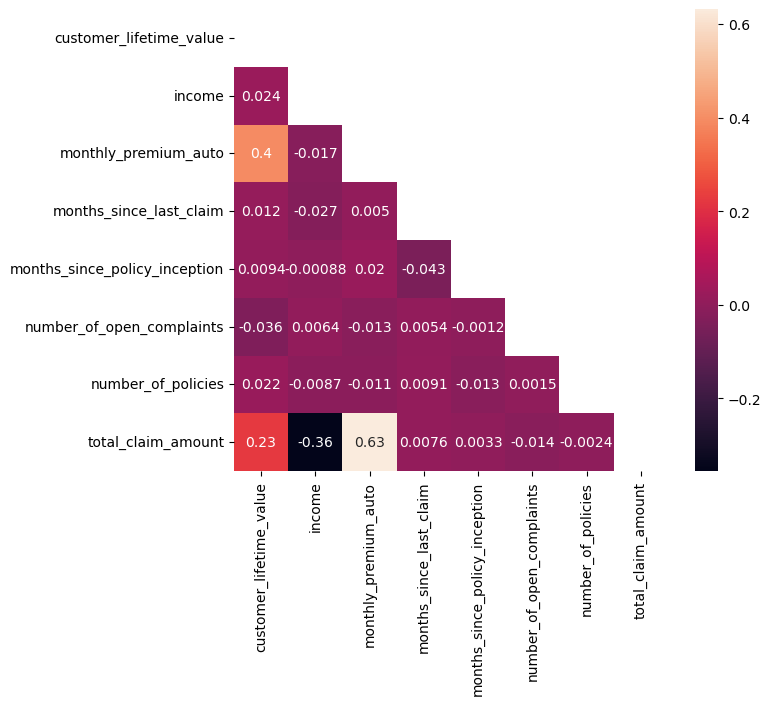

In [12]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(df.corr(), mask=mask, annot=True)
plt.show()

In [13]:
# there are no high correlations between variables. 
# the variable with highest correlation with the target is monthly_premium_auto (0.63)

# 04 - Processing Data
Dealing with outliers.

In [14]:
df.shape

(9134, 24)

In [15]:
df1 = df.copy()
df_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [16]:
# customer_lifetime_value

upper = np.percentile(df1["customer_lifetime_value"],75)
lower = np.percentile(df1["customer_lifetime_value"],25)
iqr = upper - lower
upper_limit = upper + 5 * iqr # 5 because 1.5 leaves out too many values
lower_limit = lower - 5 * iqr    
df1 = df1[(df1["customer_lifetime_value"]>lower_limit) & (df1["customer_lifetime_value"]<upper_limit)]
df1.shape

(9016, 24)

In [17]:
# income

upper = np.percentile(df1["income"],75)
lower = np.percentile(df1["income"],25)
iqr = upper - lower
upper_limit = upper + 1.5 * iqr
lower_limit = lower - 1.5 * iqr    
df1 = df1[(df1["income"]>lower_limit) & (df1["income"]<upper_limit)]
df1.shape

(9016, 24)

In [18]:
# monthly_premium_auto

upper = np.percentile(df1["monthly_premium_auto"],75)
lower = np.percentile(df1["monthly_premium_auto"],25)
iqr = upper - lower
upper_limit = upper + 1.5 * iqr
lower_limit = lower - 1.5 * iqr    
df1 = df1[(df1["monthly_premium_auto"]>lower_limit) & (df1["monthly_premium_auto"]<upper_limit)]
df1.shape

(8608, 24)

In [19]:
# months_since_last_claim

upper = np.percentile(df1["months_since_last_claim"],75)
lower = np.percentile(df1["months_since_last_claim"],25)
iqr = upper - lower
upper_limit = upper + 1.5 * iqr
lower_limit = lower - 1.5 * iqr    
df1 = df1[(df1["months_since_last_claim"]>lower_limit) & (df1["months_since_last_claim"]<upper_limit)]
df1.shape

(8608, 24)

In [20]:
# months_since_policy_inception

upper = np.percentile(df1["months_since_policy_inception"],75)
lower = np.percentile(df1["months_since_policy_inception"],25)
iqr = upper - lower
upper_limit = upper + 1.5 * iqr
lower_limit = lower - 1.5 * iqr    
df1 = df1[(df1["months_since_policy_inception"]>lower_limit) & (df1["months_since_policy_inception"]<upper_limit)]
df1.shape


(8608, 24)

In [21]:
# number_of_open_complaints

upper = np.percentile(df1["number_of_open_complaints"],75)
lower = np.percentile(df1["number_of_open_complaints"],25)
iqr = upper - lower
upper_limit = upper + 1.5 * iqr
lower_limit = lower - 1.5 * iqr    
print(upper)
print(lower)

0.0
0.0


In [22]:
# because of the distribution of this column (upper and lower percentile are 0), we need another way to remove outliers
df1 = df1[(df1["number_of_open_complaints"]<3)] 

In [23]:
df1.shape

(8137, 24)

In [24]:
# number_of_policies

upper = np.percentile(df1["number_of_policies"],75)
lower = np.percentile(df1["number_of_policies"],25)
iqr = upper - lower
upper_limit = upper + 2 * iqr
lower_limit = lower - 2 * iqr    
df1 = df1[(df1["number_of_policies"]>lower_limit) & (df1["number_of_policies"]<upper_limit)]
df1.shape

(8137, 24)

Normalization

In [25]:
# before transformations I split the target
df_num1 = df1.select_dtypes(include = np.number)
y = df_num1["total_claim_amount"]
X_num = df_num1.drop(["total_claim_amount"], axis=1)
X_num.shape


(8137, 7)

In [26]:
y.shape

(8137,)

In [27]:
transformer = MinMaxScaler().fit(X_num)
X_minmax = transformer.transform(X_num) 
X_num_norm = pd.DataFrame(X_minmax,columns= X_num.columns)
X_num_norm.shape 

(8137, 7)

Encoding Categorical Data.

In [28]:
df1 = df1.drop(["customer", "effective_to_date"], axis=1) # Drop these columns because there are too many categories

In [29]:
df_cat1 = df1.select_dtypes(include = np.object)
df_cat1.shape

(8137, 14)

In [30]:
df_cat_dumm = pd.get_dummies(df_cat1, drop_first=True)
df_cat_dumm.shape

(8137, 41)

Splitting into train set and test set.

In [37]:
X = pd.concat([X_num_norm, df_cat_dumm], axis=1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [9038, 8137]

In [ ]:
# The concat is making 901 new rows, but I don't know where is the mistake

In [35]:
X.shape

(9038, 48)

In [36]:
X.isna().sum()

customer_lifetime_value           901
income                            901
monthly_premium_auto              901
months_since_last_claim           901
months_since_policy_inception     901
number_of_open_complaints         901
number_of_policies                901
state_California                  901
state_Nevada                      901
state_Oregon                      901
state_Washington                  901
response_Yes                      901
coverage_Extended                 901
coverage_Premium                  901
education_College                 901
education_Doctor                  901
education_High School or Below    901
education_Master                  901
employmentstatus_Employed         901
employmentstatus_Medical Leave    901
employmentstatus_Retired          901
employmentstatus_Unemployed       901
gender_M                          901
location_code_Suburban            901
location_code_Urban               901
marital_status_Married            901
marital_stat

# 05 - Modeling
Apply model.

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

# 06 - Model Validation
R2.
MSE.
RMSE.
MAE.

In [ ]:
predictions  = model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)